# Análise de Classificação sobre a Pesquisa de Satisfação da Central de Serviços de TI. (Base Pesquisa_Clientes2 - Satisfeito(1) Insatisfeito(0)

In [7]:
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from matplotlib import pyplot as plt

In [8]:
dados = pd.read_csv("D:/pesquisa_clientes2.csv")

In [9]:
dados.head()

,clientes,canal,agilidade,atendimento,resolubilidade,Satisfacao
0,ADALBERTO DE MELLO,2.0,1,1,1,1
1,ADALBERTO DE PIERI GARCIA,1.0,2,2,1,1
2,ADALBERTO DE PIERI GARCIA,1.0,0,3,0,0
3,ADALBERTO DE PIERI GARCIA,3.0,1,2,0,0
4,ADALBERTO DE PIERI GARCIA,3.0,2,2,1,1


#Vamos agora transformar os atributos de valores categóricos em numéricos.

In [177]:
#dados_dmy = pd.get_dummies(dados,columns=['canal', 'agilidade', 'atendimento', 'resolubilidade'])
#dados_dmy

In [79]:
#maneira de medir a desordem de um conjunto. O valor varia de 0 à 1, onde 0 representa completamente ordenado.

#dados_dmy_um = dados_dmy[dados_dmy["canal_CHAT"]==1]
#dados_dmy_zero = dados_dmy[dados_dmy["canal_CHAT"]==0]

#print("canal_CHAT = 1")
#print(dados_dmy_um.groupby("Satisfacao").size())
#print("\n\n")

#print("canal_CHAT = 0")
#print(dados_dmy_zero.groupby("Satisfacao").size())

In [80]:
#dados_dmy_um = dados_dmy[dados_dmy["canal_PORTONET"]==1]
#dados_dmy_zero = dados_dmy[dados_dmy["canal_PORTONET"]==0]

#print("canal_PORTONET = 1")
#print(dados_dmy_um.groupby("Satisfacao").size())
#print("\n\n")

#print("canal_PORTONET = 0")
#print(dados_dmy_zero.groupby("Satisfacao").size())

In [17]:
from sklearn import tree

In [123]:
#tree.DecisionTreeClassifier?

In [29]:
X = dados_dmy[['canal_CHAT', 'canal_PORTONET', 'canal_URA', 'agilidade_Bom', 'agilidade_Otimo', 'agilidade_Ruim', 'atendimento_Bom', 'atendimento_Nao utilizei o canal 3366-3358', 'atendimento_Otimo', 'atendimento_Ruim', 'resolubilidade_Nao', 'resolubilidade_Sim']] 
Y = dados_dmy['Satisfacao']




NameError: name 'dados_dmy' is not defined

In [33]:
clf = tree.DecisionTreeClassifier()

In [32]:
# Uma linha de código e já treinamos a árvore
clf = clf.fit(X, Y)

NameError: name 'clf' is not defined

In [34]:
from graphviz import Digraph
from graphviz import Source
def plot_tree(clf_tree,X_dataset):
    with open('tree.dot','w') as td:
        g = tree.export_graphviz(clf_tree, 
                                 out_file=td,
                                 feature_names=X_dataset.columns,
                                 class_names=["N","S"],
                                 filled=True,
                                 rounded=True)
        

    with open('tree.dot','r') as td:
        src = Source(td.read())

    return src

In [35]:
plot_tree(clf,X)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [36]:
dados.corr()["Satisfacao"].sort_values()

canal            -0.042301
atendimento       0.294697
agilidade         0.618202
resolubilidade    0.769088
Satisfacao        1.000000
Name: Satisfacao, dtype: float64

In [37]:
#Explorar os Dados
dados.groupby(['atendimento', 'Satisfacao']).count()

clientes  canal  agilidade  resolubilidade
atendimento Satisfacao                                            
0           0                297    297        297             297
1           0                447    447        447             447
            1               3071   3070       3071            3071
2           0                126    126        126             126
            1               5934   5934       5934            5934
3           0                138    138        138             138
            1               1180   1180       1180            1180

In [38]:
dados.head()

,clientes,canal,agilidade,atendimento,resolubilidade,Satisfacao
0,ADALBERTO DE MELLO,2.0,1,1,1,1
1,ADALBERTO DE PIERI GARCIA,1.0,2,2,1,1
2,ADALBERTO DE PIERI GARCIA,1.0,0,3,0,0
3,ADALBERTO DE PIERI GARCIA,3.0,1,2,0,0
4,ADALBERTO DE PIERI GARCIA,3.0,2,2,1,1


In [39]:
dados.corr()["Satisfacao"].sort_values()

canal            -0.042301
atendimento       0.294697
agilidade         0.618202
resolubilidade    0.769088
Satisfacao        1.000000
Name: Satisfacao, dtype: float64

In [69]:
from sklearn.model_selection import train_test_split

X = dados[["agilidade","resolubilidade"]]
y = dados["Satisfacao"]

x_treino, x_teste,y_treino, y_teste = train_test_split(X,
                                                       y,
                                                       test_size = .3,
                                                       random_state=25)

In [70]:
clf_dados = tree.DecisionTreeClassifier()

#Uma linha de treino 
clf_dados = clf_dados.fit(x_treino, y_treino)

In [71]:
predict = clf_dados.predict(x_teste)

In [72]:
from sklearn import metrics
print(metrics.confusion_matrix(y_teste,predict))

[[ 304   10]
 [   0 3044]]


In [73]:
#Validar Modelo
print(metrics.classification_report(y_teste, predict))

             precision    recall  f1-score   support

          0       1.00      0.97      0.98       314
          1       1.00      1.00      1.00      3044

avg / total       1.00      1.00      1.00      3358



In [74]:
#Treinar Modelo
from sklearn.ensemble import RandomForestClassifier

rf_dados = RandomForestClassifier(random_state=42)


rf_dados = rf_dados.fit(x_treino, y_treino)

In [75]:
type(rf_dados)

sklearn.ensemble.forest.RandomForestClassifier

In [76]:
# Lista de árvores
list_trees = rf_dados.estimators_

In [77]:
type(list_trees[0])

sklearn.tree.tree.DecisionTreeClassifier

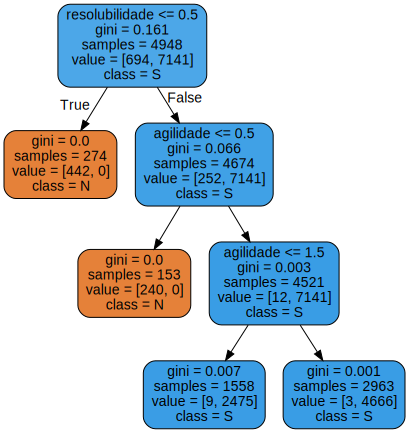

In [78]:
plot_tree(list_trees[0],x_treino)

In [50]:
predict = rf_dados.predict(x_teste)
print(metrics.confusion_matrix(y_teste,predict))

[[ 304   10]
 [   0 3044]]


In [51]:
print(metrics.classification_report(y_teste, predict))

             precision    recall  f1-score   support

          0       1.00      0.97      0.98       314
          1       1.00      1.00      1.00      3044

avg / total       1.00      1.00      1.00      3358



In [52]:
oob =[]
n_estimators = list(range (2,60))
for i in n_estimators:
    rf_dados =RandomForestClassifier(oob_score=True, n_estimators=i, random_state=42)
    rf_dados = rf_dados.fit(x_treino, y_treino)
    oob.append(rf_dados.oob_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably me

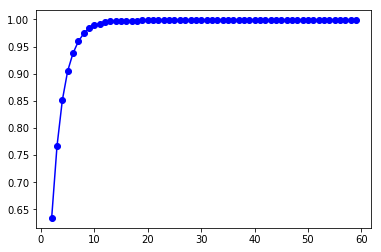

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(n_estimators,oob,'o-b')

In [54]:
max_oob = max(oob)
index_max_oob = oob.index(max_oob)
estimators = n_estimators[index_max_oob]

print("""OOB Score: {}
Estimators: {} """.format(max_oob,estimators))

OOB Score: 0.9983407785577537
Estimators: 22 


In [55]:
rf_dados_2 =RandomForestClassifier( n_estimators=estimators, random_state=42)
rf_dados_2 = rf_dados_2.fit(x_treino, y_treino)

In [56]:
predict = rf_dados_2.predict(x_teste)
print(metrics.confusion_matrix(y_teste,predict))

[[ 304   10]
 [   0 3044]]


In [57]:
print(metrics.classification_report(y_teste, predict))

             precision    recall  f1-score   support

          0       1.00      0.97      0.98       314
          1       1.00      1.00      1.00      3044

avg / total       1.00      1.00      1.00      3358



In [58]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(rf_dados_2, x_treino, y_treino, cv=10)
mean_accuracy = sum(accuracy)/len(accuracy)

print("""Scores:{}
Mean:{}""".format(accuracy,mean_accuracy))

Scores:[0.99872611 0.99744898 0.99744898 0.99872449 1.         0.99744572
 0.99872286 0.99872286 0.99744572 0.99872286]
Mean:0.9983408589172056
